In [1]:
import matplotlib
import pylab
import matplotlib.pyplot as plt
import matplotlib
import h5py
import numpy as np
import os
import os.path
from CFDmodule import *
from readStep import *
from PIL import Image  
%matplotlib inline

In [15]:
#specify inout parameters here
gamma=5.0/3.0
g=1.0
Lz=4
waveLen = 1
Ly = waveLen
rho_l = 1
rho_h = 2
CFDmethod = False
#####input done

In [16]:
###calculate some parameters
dz=dy=dx=Lz/nz

if nx == 1:
    dx=1.0
    
horizon_lim = (0, Ly-dy)
vert_lim = (0, Lz-dz)
extent=horizon_lim+vert_lim

FieldPoint = h5file.get('Fields').values()
totalsteps, specout = get_LatestTime(FieldPoint)

step = []
for i in range(totalsteps/specout):
    step.append(str((i+1)*specout).zfill(6))
    
istep = str(totalsteps).zfill(6)

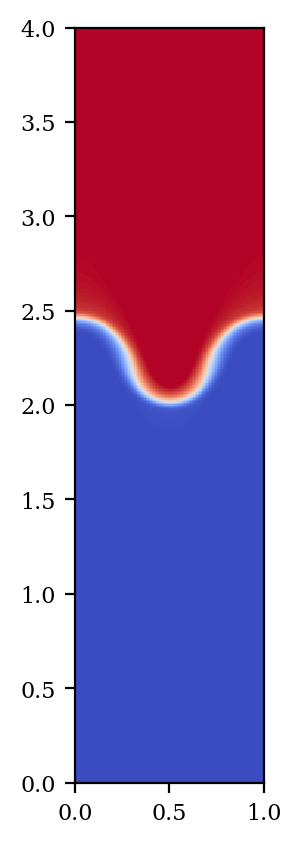

In [17]:
mylist = ['Fields/','Prho','/',istep]
filepath = delimiter.join(mylist)
databk = h5file.get(filepath)
rho = np.array(databk)
rho = np.transpose(rho)
rho = np.transpose(np.reshape(rho, (ny,nz)))

fig_pi = plt.figure(1, figsize = (5*1.214,5.0), dpi=200)
plt.rc('font', family='serif', size=8)
plt.imshow(rho, origin='none', extent=horizon_lim+vert_lim, aspect=1,
           cmap='coolwarm',vmin=rho_l,vmax=rho_h)


In [18]:
##store initial field
mylist = ['Fields/', 'Prho', '/', '000001']
filepath = delimiter.join(mylist)
rho0 = np.array(h5file.get(filepath))
mylist = ['Fields/', 'PPress', '/', '000001']
filepath = delimiter.join(mylist)
Press0 = np.array(h5file.get(filepath))
mylist = ['Fields/', 'PVz', '/', '000001']
filepath = delimiter.join(mylist)
Vz0 = np.array(h5file.get(filepath))
mylist = ['Fields/', 'PBz', '/', '000001']
filepath = delimiter.join(mylist)
Bz0 = np.array(h5file.get(filepath))

In [19]:
rho1d = np.zeros((len(step),nz))
Press1d = np.zeros((len(step),nz))
Vz1d = np.zeros((len(step),nz))
Bz1d = np.zeros((len(step),nz))

seq = 0

for istep in step:
    mylist = ['Fields/', 'PVz', '/', istep]
    filepath = delimiter.join(mylist)
    Vz = np.array(h5file.get(filepath)) - Vz0
    
    Vz1d[seq] = Vz[:,ny/2,0]
    
    Vz = np.transpose(rho)
    Vz = np.transpose(np.reshape(Vz, (ny,nz)))

#     fig_pi = plt.figure(1, figsize = (5*1.214,5.0), dpi=200)
#     plt.rc('font', family='serif', size=8)
#     plt.imshow(Vz, origin='none', extent=horizon_lim+vert_lim, aspect=1,
#            cmap='coolwarm')
#     plt.show()
    
    
    mylist = ['Fields/', 'Prho', '/', istep]
    filepath = delimiter.join(mylist)
    rho = np.array(h5file.get(filepath)) - rho0
    rho1d[seq] = rho[:,ny/2,0]
    
    mylist = ['Fields/', 'PPress', '/', istep]
    filepath = delimiter.join(mylist)
    Press = np.array(h5file.get(filepath)) - Press0
    Press1d[seq] = Press[:,ny/2,0]
    
    mylist = ['Fields/', 'PBz', '/', istep]
    filepath = delimiter.join(mylist)
    Bz = np.array(h5file.get(filepath)) - Bz0
    Bz1d[seq] = Press[:,ny/2,0]
    
    
    seq += 1


In [20]:
#https://brushingupscience.com/2016/06/21/matplotlib-animations-the-easy-way/
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


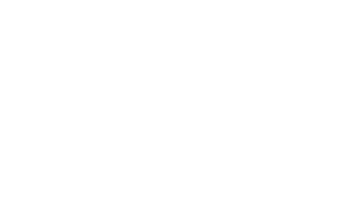

<IPython.core.display.Javascript object>


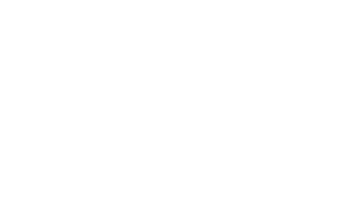

In [21]:
#show Vz
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(ylim=(-0.2, 0.1))
line = ax.plot(Vz1d[0, :], color='k', lw=2)[0]
def animate(i):
    line.set_ydata(Vz1d[i, :])
anim = FuncAnimation(fig, animate, interval=100, frames=len(step)-1)
 
plt.draw()
plt.show()

<IPython.core.display.Javascript object>


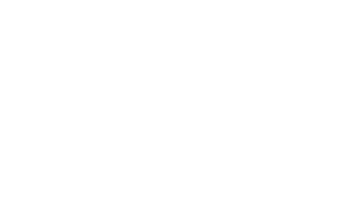

<IPython.core.display.Javascript object>


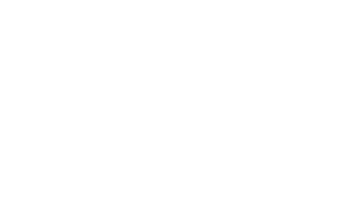

In [10]:
#show rho
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(ylim=(-0.2, 0.2))
line = ax.plot(rho1d[0, :], color='k', lw=2)[0]
def animate(i):
    line.set_ydata(rho1d[i, :])
anim = FuncAnimation(fig, animate, interval=100, frames=len(step)-1)
 
plt.draw()
plt.show()

<IPython.core.display.Javascript object>


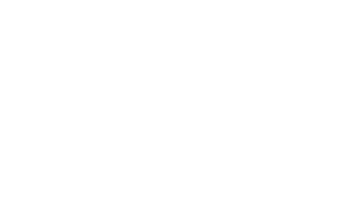

<IPython.core.display.Javascript object>


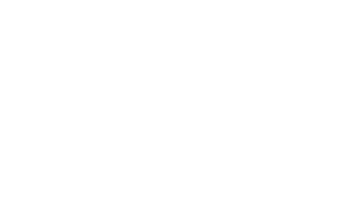

In [24]:
#show Press
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(ylim=(-0.2, 0.2))
line = ax.plot(Press1d[0, :], color='k', lw=2)[0]
def animate(i):
    line.set_ydata(Press1d[i, :])
anim = FuncAnimation(fig, animate, interval=100, frames=len(step)-1)
 
plt.draw()
plt.show()

<IPython.core.display.Javascript object>


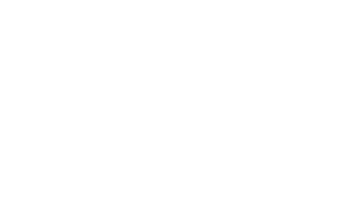

<IPython.core.display.Javascript object>


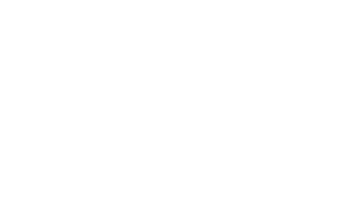

In [23]:
#show Bz
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(ylim=(-0.2, 0.2))
line = ax.plot(Bz1d[0, :], color='k', lw=2)[0]
def animate(i):
    line.set_ydata(Bz1d[i, :])
anim = FuncAnimation(fig, animate, interval=100, frames=len(step)-1)
 
plt.draw()
plt.show()

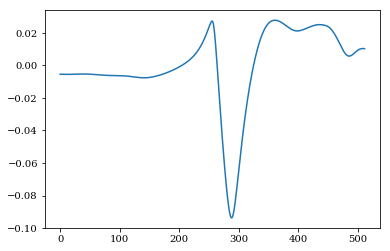

In [26]:
%matplotlib inline
plt.plot(Press1d[199, :])
plt.draw()
plt.show()